In this notebook, we explore Region of interest detection using scikit-maad


https://scikit-maad.github.io/_auto_examples/2_advanced/plot_compare_auto_and_manual_rois_selection.html

In [2]:
import librosa
import pandas as pd
import numpy as np
import soundfile as sf
import matplotlib.pyplot as plt
from IPython.display import Audio
import maad
from maad import rois, util
from maad import sound, rois, features
from maad.util import (power2dB, plot2d, format_features, read_audacity_annot,
                       overlay_rois, overlay_centroid)
from maad.features import all_shape_features 
# from ROI import find_ROIs_soundfile
import plotly.tools as tls
from plotly import optional_imports

In [4]:
wavfilepath = '/Users/Paul/Paul/Desktop/My_projects/Bioacoustics/BioSound_Maputo/datasets/xenocanto/wav/Mirafra_africana/346035.wav'

In [5]:
from ROI import compute_Sxx_dB_nonoise_smooth,ROI_and_centroid
import plotly_express as px
def update_spectro_data(wav_dropdown=wavfilepath,n_clicks=0, smoothing=0.5, frequency_selection=[0,20000]):

        
    fmin = frequency_selection[0]
    fmax = frequency_selection[1]

    Sxx, tn, fn, ext = compute_Sxx_dB_nonoise_smooth(
        path=wav_dropdown, fmin=fmin, fmax=fmax, smoothing=smoothing)

    # df_fn = pd.DataFrame(fn, columns=['fn']).to_dict('records')
    # df_tn = pd.DataFrame(tn, columns=['tn']).to_dict('records')
    # df_ext = pd.DataFrame(ext, columns=['ext']).to_dict('records')
    df_Sxx = pd.DataFrame(Sxx).to_dict('records')
    df_fn = pd.DataFrame(fn).to_dict()
    df_tn = pd.DataFrame(tn,columns=['tn']).to_dict('records')
    df_ext = pd.DataFrame([ext]).to_dict('records')

    return df_Sxx, df_fn,df_tn,df_ext,ext,fn,tn,Sxx



In [6]:
df_Sxx, df_fn,df_tn,df_ext,ext,fn,tn,Sxx = update_spectro_data()

/Users/Paul/Paul/Desktop/My_projects/Bioacoustics/Maputo_Dash/.venv/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning:

PySoundFile failed. Trying audioread instead.



In [7]:

_, _, centroid=ROI_and_centroid(
        Sxx_db_noNoise_smooth=Sxx, tn=tn, fn=fn, ext=ext, mode_bin='relative', param1=12, param2=0.3, display=False)

number of rois : 74


In [8]:
df_ROI_final = pd.read_csv('/Users/Paul/Paul/Desktop/My_projects/Bioacoustics/Maputo_Dash/datasets/tables/df_ROI_final.csv')


In [9]:
Sxxt = pd.DataFrame.from_dict(df_Sxx).to_numpy()
fn=pd.DataFrame.from_dict(df_fn)[0].to_numpy()
tn=pd.DataFrame.from_dict(df_tn)[0].to_numpy()
ext=list(pd.DataFrame.from_dict(df_ext)[0].to_numpy())

fig_kwargs = {'vmax': Sxxt.max(),
                      'vmin': -20,
                      'figsize': (4, 13),
                      'xlabel': 'Time [sec]',
                      'ylabel': 'Frequency [Hz]',
                      'cmap': 'viridis'
                      }
fig = px.imshow(Sxxt, color_continuous_scale='viridis', origin='lower',
                labels=dict(x="Time (sec)",
                            y="Frequency (Hz)", color="Level (dB"),
                x=tn,
                y=fn,
                aspect='auto')


KeyError: 0

In [ ]:
fig.show()

/Users/Paul/Paul/Desktop/My_projects/Bioacoustics/Maputo_Dash/.venv/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning:

PySoundFile failed. Trying audioread instead.



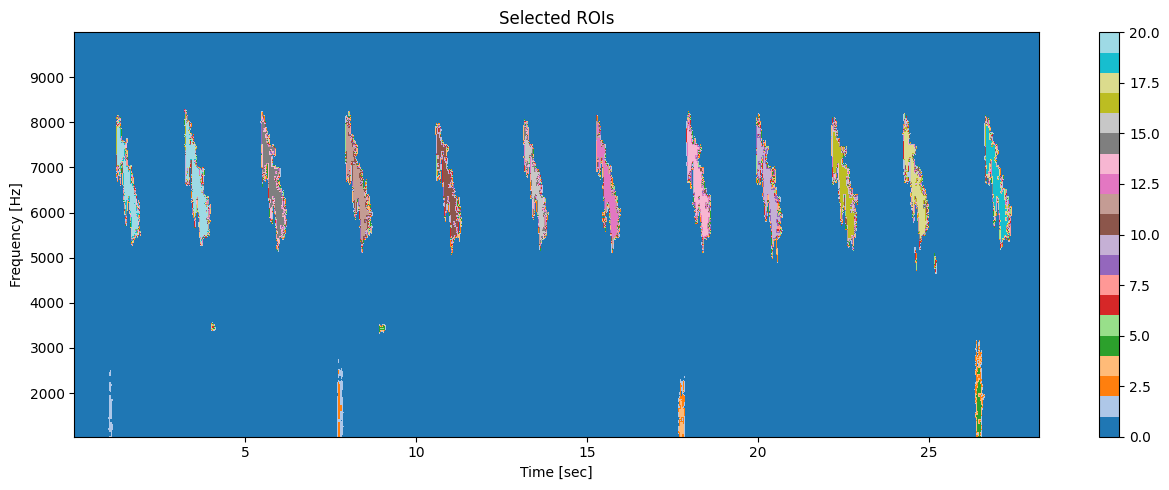

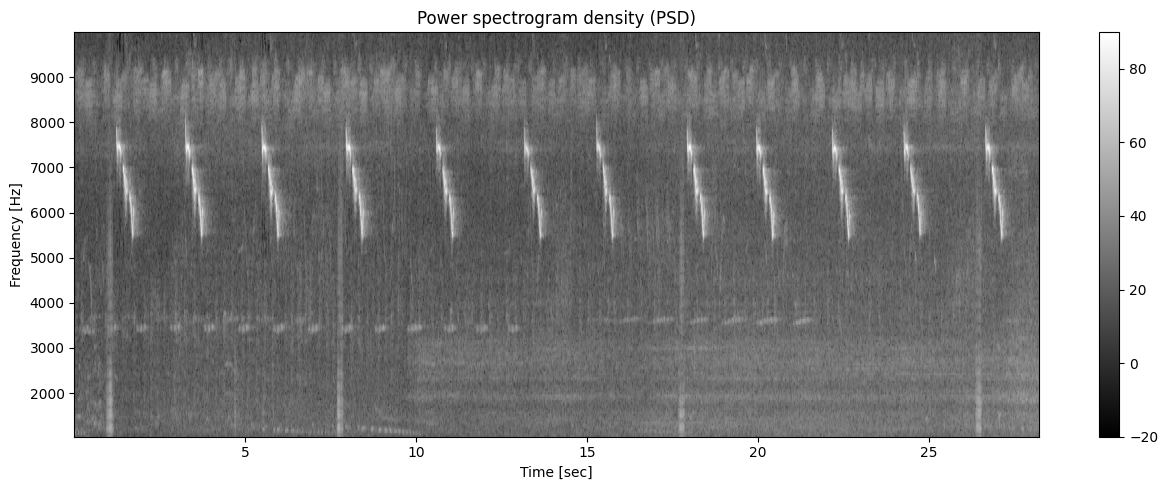

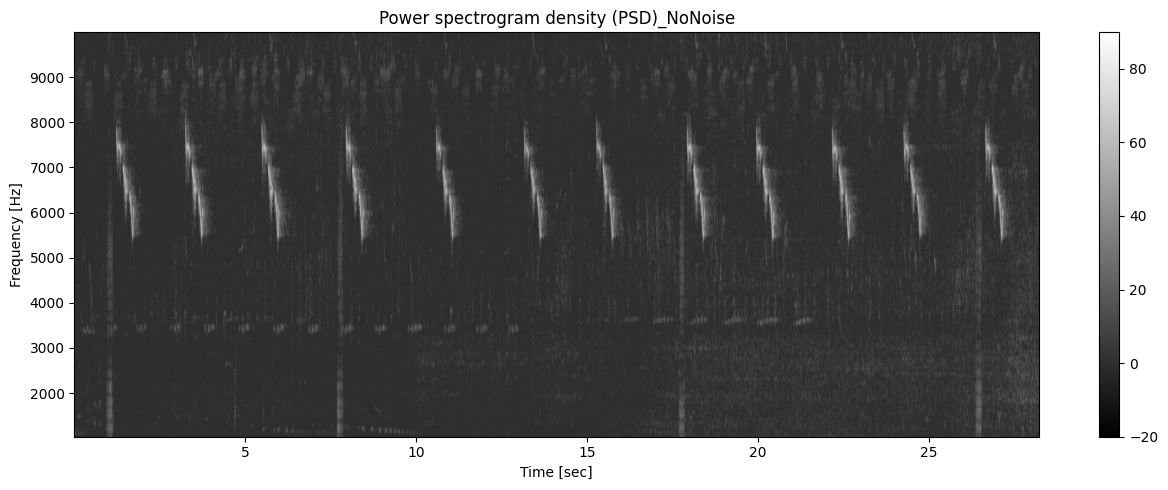

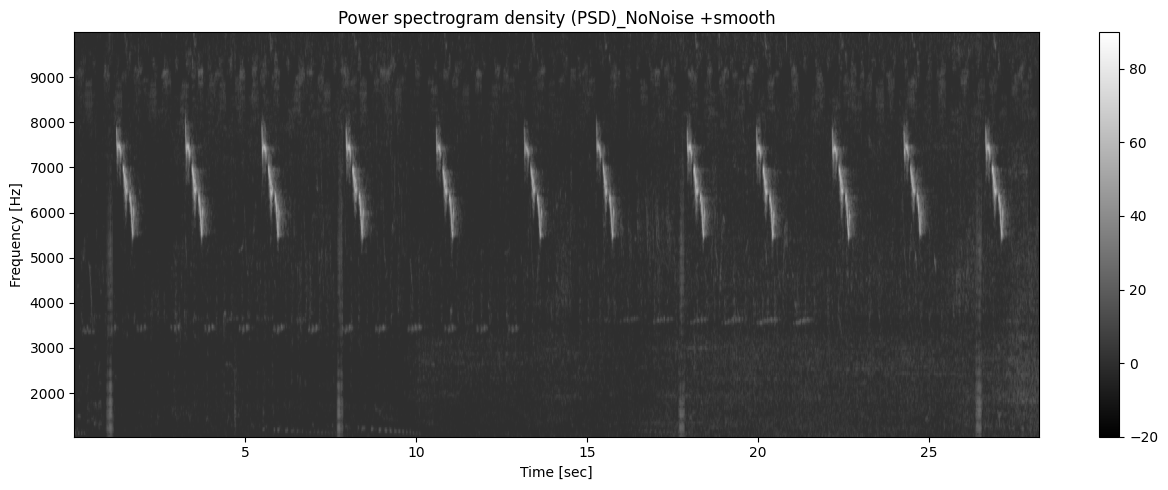

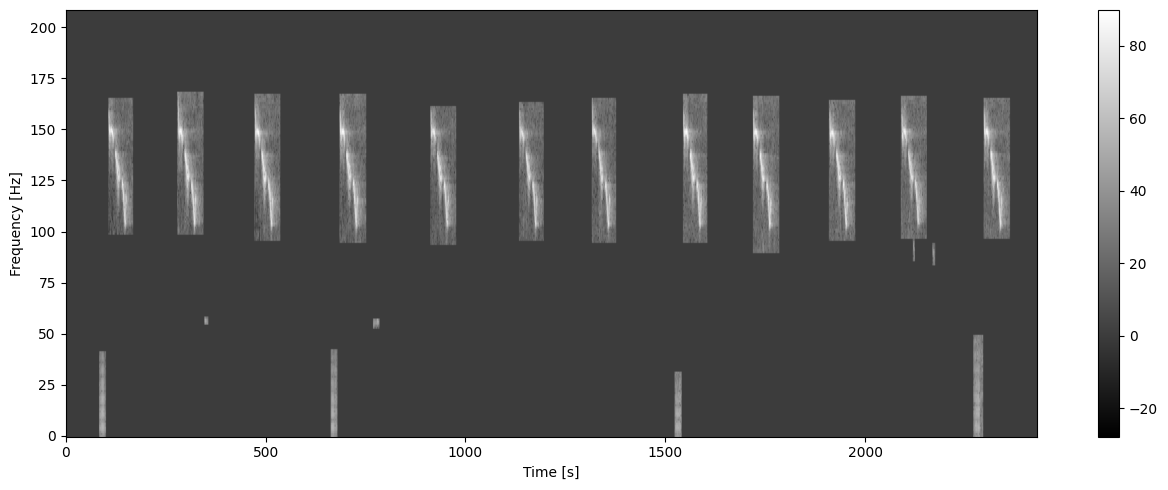

In [10]:
df_rois, s, fs, fig, ax = find_ROIs_soundfile(
            path=wavfilepath, display=True, mode_bin='relative', param1=7, param2=0.7, fmin=1000, fmax=10000)

In [11]:
df_rois

,labelID,label,min_y,min_x,max_y,max_x,min_f,min_t,max_f,max_t
0,1,unknown,0,83,41,99,1033.593750,0.975238,2799.316406,1.160998
1,2,unknown,0,662,42,678,1033.593750,7.697415,2842.382812,7.883175
2,3,unknown,0,1522,31,1539,1033.593750,17.681995,2368.652344,17.879365
3,4,unknown,0,2269,49,2293,1033.593750,26.354649,3143.847656,26.633288
4,5,unknown,53,768,57,783,3316.113281,8.928073,3488.378906,9.102222
5,6,unknown,55,346,58,355,3402.246094,4.028662,3531.445312,4.133152
6,7,unknown,84,2167,94,2173,4651.171875,25.170431,5081.835938,25.240091
7,8,unknown,86,2118,97,2122,4737.304688,24.601542,5211.035156,24.647982
8,9,unknown,90,1718,166,1783,4909.570312,19.957551,8182.617188,20.712200
9,10,unknown,94,911,161,975,5081.835938,10.588299,7967.285156,11.331338


In [ ]:
#workaround RIFF bug from xenocanto import TO BE CHANGED
temp,sr = librosa.load(wavfilepath)
sf.write('tmp.wav', temp,sr)

#Load using Maad, compute spectro
dB_max = 96
s, fs = maad.sound.load('tmp.wav')

# #filter bandwidth
# s_filtered = maad.sound.select_bandwidth(s,fs,fcut=(100,6000), forder=5, fname ='butter', ftype='bandpass')
# s = s_filtered

maxAmp = np.abs(s).max() #used to normalize
Sxx_power,tn,fn,ext = maad.sound.spectrogram (s/maxAmp, fs, flims=(1000,9000), display=False)           
Sxx_db = maad.util.power2dB(Sxx_power) + dB_max

#Denoise it
# First we remove the stationary background using median equalizer in order to increase the contrast [1]
# Then we convert the spectrogram into dB
Sxx_power_noNoise= sound.median_equalizer(Sxx_power, display=False, **{'extent':ext})
Sxx_db_noNoise = power2dB(Sxx_power_noNoise)

# Then we smooth the spectrogram in order to facilitate the creation of masks as
# small sparse details are merged if they are close to each other
Sxx_db_noNoise_smooth = sound.smooth(Sxx_db_noNoise, std=0.5,
                         display=False, savefig=None,
                         **{'vmin':0, 'vmax':dB_max, 'extent':ext})


In [ ]:
fs

In [ ]:
#Plot spectrograms to see Denoising and smoothing process
fig_kwargs = {'vmax': Sxx_db.max(),
                  'vmin':-20,
                  'extent':ext,
                  'figsize':(4,13),
                  'xlabel':'Time [sec]',
                  'ylabel':'Frequency [Hz]',
                  'cmap' :'viridis'
                  }
fig, ax = maad.util.plot2d(Sxx_db,title='Power spectrogram density (PSD)',**fig_kwargs)
fig, ax = maad.util.plot2d(Sxx_db_noNoise,title='Power spectrogram density (PSD)_NoNoise',**fig_kwargs)
fig, ax = maad.util.plot2d(Sxx_db_noNoise_smooth,title='Power spectrogram density (PSD)_NoNoise +smooth', **fig_kwargs)


In [ ]:
# Then we create a mask (i.e. binarization of the spectrogram) by using the
# double thresholding technique
im_mask = rois.create_mask(im=Sxx_db_noNoise_smooth, mode_bin ='relative',
                           bin_std=10, bin_per=0.89,
                           verbose=False, display=False)

# Finaly, we put together pixels that belong to the same acoustic event, and
# remove very small events (<=25 pixel²)
im_rois, df_rois = rois.select_rois(im_mask, min_roi=25, max_roi=None,
                                 display= True,
                                 **{'extent':ext,'figsize':(4,13)})

In [ ]:
# format dataframe df_rois in order to convert pixels into time and frequency
df_rois = format_features(df_rois, tn, fn)

In [ ]:
#visualize durations
plt.bar(df_rois.labelID,df_rois.max_t - df_rois.min_t)

In [ ]:
df_rois['bandwidth'] = df_rois['max_f']-df_rois['min_f']

In [ ]:
df_rois

In [ ]:
df_rois = df_rois[df_rois['bandwidth']<3000]

In [ ]:
df_rois

In [ ]:
im_zeros = np.zeros(Sxx_db.shape)
im_blobs = rois.rois_to_imblobs(im_zeros, df_rois)
only_blobs = im_blobs*Sxx_db
util.plot2d(only_blobs)

In [ ]:
#compute features using MAAD
df_rois_shape = all_shape_features(s, fs, df_rois, resolution='med', display=True)
#Filter those that we understand
relevant_features = [
    'labelID', 'min_f','min_t', 'max_f', 'max_t','centroid_f', 'centroid_t', 'duration_t', 'bandwidth_f', 'area_tf']

df_rois_features = df_rois_shape.loc[:,relevant_features]

In [ ]:
#COMPUTE MAAD SPECTRAL AND TEMPORAL ALPHA FEATURES ON EACH ROI
SPECTRAL_FEATURES=['MEANf','VARf','SKEWf','KURTf','NBPEAKS','LEQf',
'ENRf','BGNf','SNRf','Hf', 'EAS','ECU','ECV','EPS','EPS_KURT','EPS_SKEW','ACI',
'NDSI','rBA','AnthroEnergy','BioEnergy','BI','ROU','ADI','AEI','LFC','MFC','HFC',
'ACTspFract','ACTspCount','ACTspMean', 'EVNspFract','EVNspMean','EVNspCount',
'TFSD','H_Havrda','H_Renyi','H_pairedShannon', 'H_gamma', 'H_GiniSimpson','RAOQ',
'AGI','ROItotal','ROIcover']

TEMPORAL_FEATURES=['ZCR','MEANt', 'VARt', 'SKEWt', 'KURTt',
               'LEQt','BGNt', 'SNRt','MED', 'Ht','ACTtFraction', 'ACTtCount',
               'ACTtMean','EVNtFraction', 'EVNtMean', 'EVNtCount']

df_temporal_features = pd.DataFrame(columns=TEMPORAL_FEATURES)
df_spectral_features = pd.DataFrame(columns=SPECTRAL_FEATURES)

for index, row in df_rois.iloc[1:].iterrows():
    # trim to ROI
    s_trim = sound.trim(s, fs, row['min_t'], row['max_t'])
    s_trim = s_trim - np.mean(s_trim)
    s_trim = s_trim / np.max(np.abs(s_trim))

    
    #compute spectral alpha indices for each ROI
    Sxx_trim_power,tn,fn,ext = sound.spectrogram (s_trim, fs,
                                             verbose = False, display = False,
                                             savefig = None)

    spectral_features_temp, _ = maad.features.all_spectral_alpha_indices(Sxx_trim_power,tn,fn,display=False)
    df_spectral_features = df_spectral_features.append(spectral_features_temp, ignore_index=True)


    # compute temporal alpha indices for each ROI
    temp = maad.features.all_temporal_alpha_indices (s_trim,fs)
    df_temporal_features = df_temporal_features.append(temp,ignore_index=True)

    




In [ ]:
df_rois_all_features = pd.concat([df_rois_features,df_spectral_features,df_temporal_features],axis=1)

In [ ]:
df_rois_all_features.describe()

In [ ]:
df_rois_all_features.columns

In [ ]:
df_rois_all_features.to_csv('/Users/Paul/Paul/Desktop/My_projects/Bioacoustics/Maputo_Dash/datasets/all_features_Cyanomitra_olivacea.csv')

In [ ]:
df_rois_all_features


TESTING GROUNDS:

In [ ]:
import plotly_express as px
import plotly.graph_objs as go
# fig = px.imshow(Sxx_db_noNoise_smooth, color_continuous_scale='RdBu_r')
fig = px.imshow(Sxx_db_noNoise_smooth, color_continuous_scale='viridis', origin='lower',
                labels=dict(x="Time (sec)",
                            y="Frequency (Hz)", color="Level (dB"),
                x=tn,
                y=fn,
                aspect='auto')

In [ ]:
fig

In [ ]:
im_mask = rois.create_mask(im=Sxx_db_noNoise_smooth, mode_bin='relative',
                            bin_std=7, bin_per=0.7,
                            verbose=False, display=False)

# Finaly, we put together pixels that belong to the same acoustic event, and
# remove very small events (<=25 pixel²)
im_rois, df_rois = rois.select_rois(im_mask, min_roi=25, max_roi=None,
                                    display=False,
                                    **{'extent': ext, 'figsize': (4, 13)})

# format dataframe df_rois in order to convert pixels into time and frequency
df_rois = format_features(df_rois, tn, fn)
im_zeros = np.zeros(Sxx_db_noNoise_smooth.shape)
im_blobs = rois.rois_to_imblobs(im_zeros, df_rois)
only_blobs = im_blobs*Sxx_db_noNoise_smooth

In [ ]:
from maad.features import centroid_features
centroid = centroid_features(Sxx_db_noNoise_smooth, df_rois) 
centroid = format_features(centroid, tn, fn)

In [ ]:
for i in range(0,len(centroid),1):        
    fig.add_shape(type='rect', x0=centroid.min_t[i],x1=centroid.max_t[i],y0=centroid.min_f[i],y1=centroid.max_f[i],line=dict(
            color="Yellow",
            width=1,
        ),)

In [ ]:
fig

In [ ]:
ax, fig = overlay_rois(Sxx_db_noNoise_smooth, df_rois)
# view centroids
overlay_centroid(Sxx_db, centroid, savefig=None, 
                    fig=fig, ax=ax)

In [ ]:
df_rois

In [ ]:
y = [0,2000]

In [ ]:
y[0]